**Installing dependencies**

In [3]:
from qiskit import QuantumCircuit, transpile
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram
import numpy as np
from qiskit.quantum_info import DensityMatrix, Statevector
from qiskit.visualization import circuit_drawer, plot_state_city, plot_state_qsphere, plot_bloch_multivector, plot_state_hinton, plot_state_paulivec
from qiskit.visualization import plot_state_qsphere
from qiskit.providers.basic_provider import BasicProvider
import matplotlib.pyplot as plt

**Bernstein-Vazirani Algorithm**

In [4]:
class QuantumBV:
    def __init__(self, secret_string):
        self.secret_string = secret_string
        self.n = len(secret_string)
        self.qc = self.prepare_circuit()
        self.qc1 = self.prepare_circuit1()
        self.simulator =  BasicProvider().get_backend()

    def prepare_circuit(self):
        qc = QuantumCircuit(self.n + 1, self.n)
        # Step 0: Initialize the last qubit to |1>
        qc.x(self.n)

        # Step 1: Apply Hadamard gates to all qubits
        qc.h(range(self.n + 1))
        qc.barrier()
        # Step 2: Apply CNOT gates based on the secret string
        for ii, yesno in enumerate(reversed(self.secret_string)):
            if yesno == '1':
                qc.cx(ii, self.n)
        qc.barrier()
        # Step 3: Apply Hadamard gates again to all qubits except the last one
        qc.h(range(self.n+1))
        qc.barrier()
        for i in range(self.n):
            qc.measure(i,i)
        return qc

    def prepare_circuit1(self):
        qc1 = QuantumCircuit(self.n + 1, self.n)
        # Step 0: Initialize the last qubit to |1>
        qc1.x(self.n)

        # Step 1: Apply Hadamard gates to all qubits
        qc1.h(range(self.n + 1))
        qc1.barrier()
        # Step 2: Apply CNOT gates based on the secret string
        for ii, yesno in enumerate(reversed(self.secret_string)):
            if yesno == '1':
                qc1.cx(ii, self.n)
        qc1.barrier()
        # Step 3: Apply Hadamard gates again to all qubits except the last one
        qc1.h(range(self.n+1))
        qc1.barrier()
        return qc1

    def run_simulation(self, shots=1024):
        transpiled_qc = transpile(self.qc, self.simulator)
        job = self.simulator.run(transpiled_qc, shots=shots)
        self.result = job.result()

    def run_simulation1(self, shots=1024):
        #transpiled_qc = transpile(self.qc, self.sim_backend)
        job = self.simulator.run(self.qc1, shots=shots)
        self.result = job.result()

    def get_counts(self):
        if self.result:
            return self.result.get_counts(self.qc)
        else:
            raise RuntimeError("Simulation has not been run yet.")

    def plot_results(self):
        counts = self.get_counts()
        plot_histogram(counts)
        plt.show()

    def psi(self):
        psi = Statevector(self.qc1)
        return psi

    def get_density(self):
        psi = Statevector(self.qc1)
        return DensityMatrix(psi).draw("latex").data

    def get_city(self):
        psi = Statevector(self.qc1)
        return plot_state_city(psi)

    def get_circuit(self):
        return circuit_drawer(self.qc, output='mpl', filename='circuit.png')

    def get_hinton(self):
        psi = Statevector(self.qc1)
        return plot_state_hinton(psi)

    def get_paulivec(self):
        psi = Statevector(self.qc1)
        return plot_state_paulivec(psi)

    def get_qsphere(self):
        psi = Statevector(self.qc1)
        return plot_state_qsphere(psi)

    def get_bloch(self):
        psi = Statevector(self.qc1)
        return plot_bloch_multivector(psi)

**Running simulation with measurement**

In [5]:
secret_string = '10'
simulator = QuantumBV(secret_string)
simulator.run_simulation()

**Counts**

In [6]:
simulator.get_counts()

{'10': 1024}

**Running simuation wihout measurements**

In [7]:
simulator.run_simulation1()

**Density matrix**

In [8]:
from IPython.display import display, Latex
dmatrix=simulator.get_density()
display(Latex(dmatrix))

<IPython.core.display.Latex object>

**Qsphere representation**

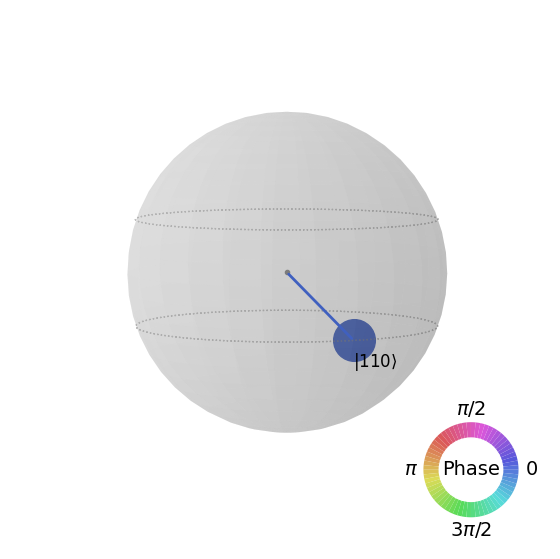

In [9]:
simulator.get_qsphere()

**City Representation**

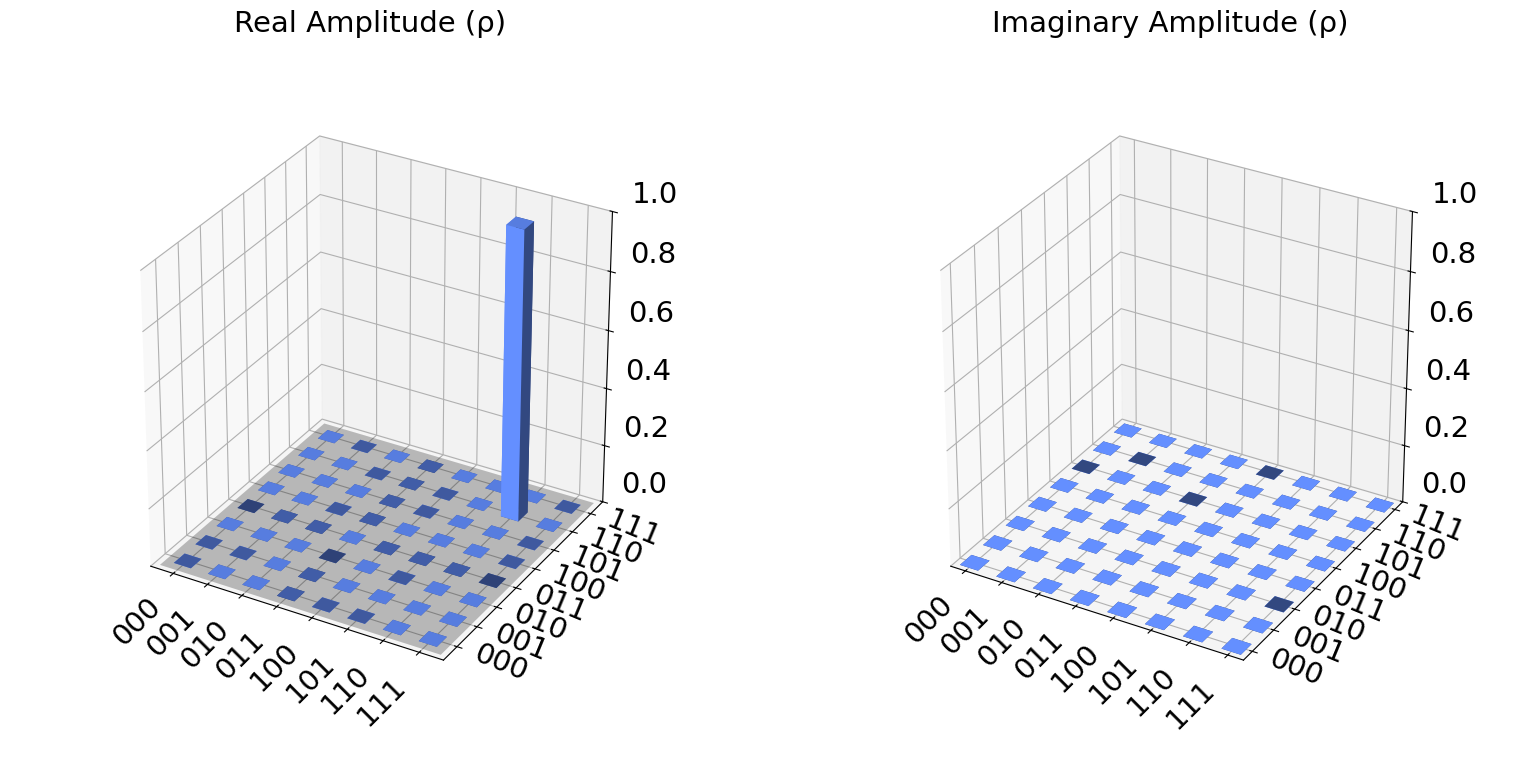

In [10]:
simulator.get_city()

**Circuit Representation**

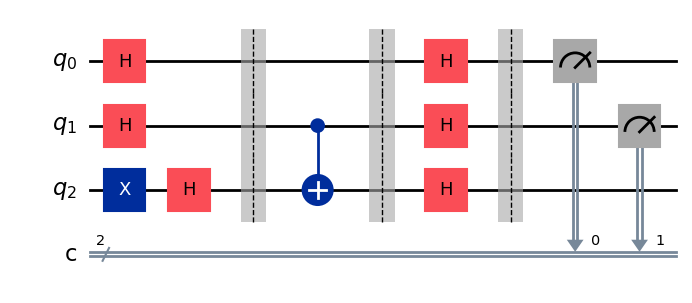

In [11]:
simulator.get_circuit()

**Hinton Representation**

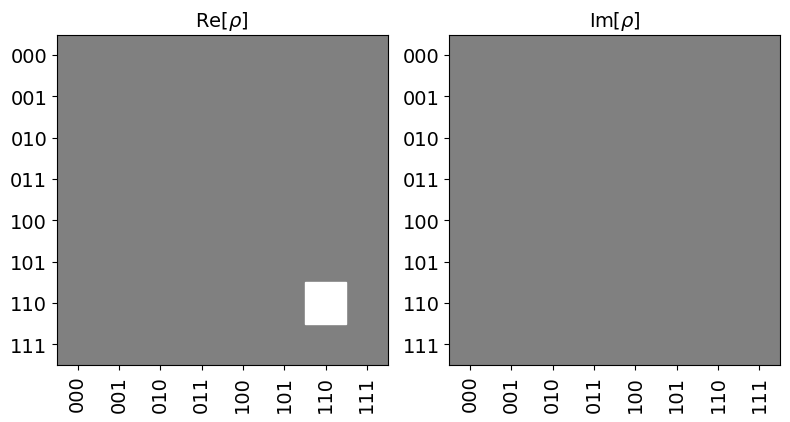

In [13]:
simulator.get_hinton()

**Paulivector Representation**

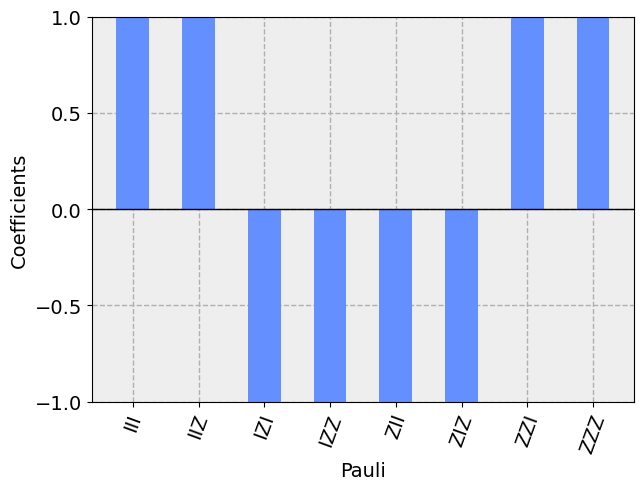

In [14]:
simulator.get_paulivec()

**Bloch sphere Representation**

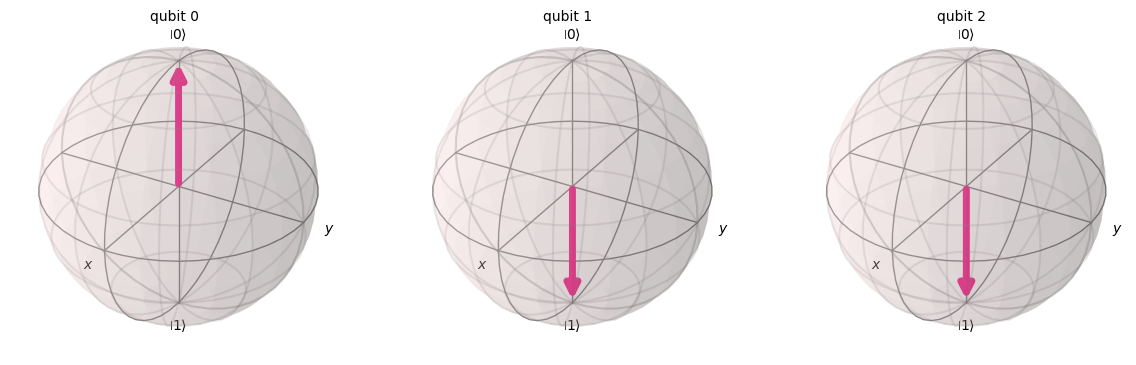

In [15]:
simulator.get_bloch()